In [56]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
# Loading the dataset
df= pd.read_csv('books.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [58]:
df.shape


(550, 7)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [60]:
df.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


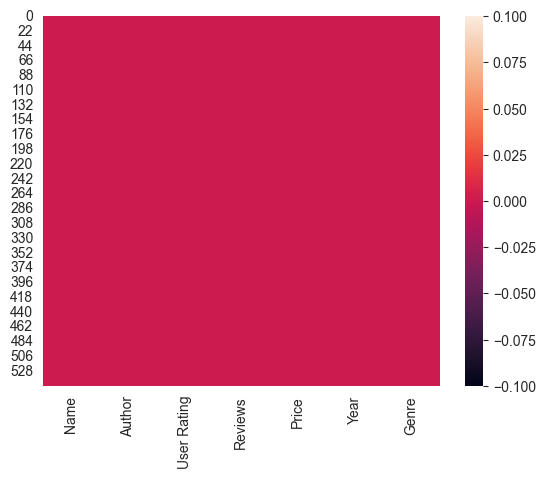

In [61]:
sns.heatmap(df.isnull())
plt.show()

<AxesSubplot: >

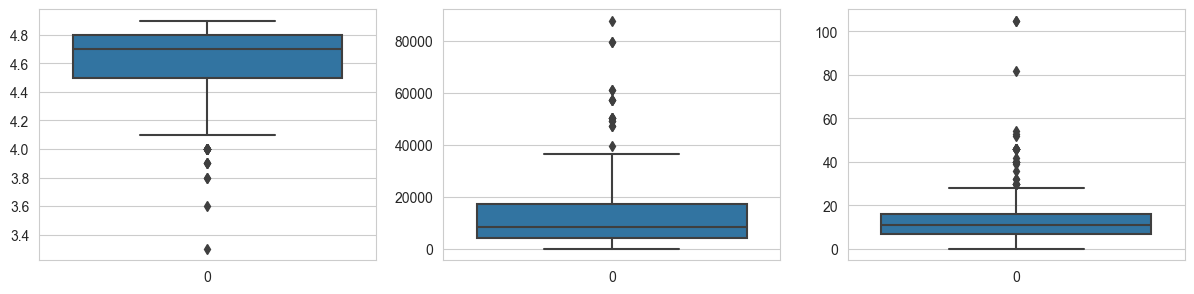

In [62]:
# Detecting outliers
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(df['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(df['Price'])

In [63]:
# Removing outliers
df['Price'] = df['Price'].clip(lower=df['Price'].quantile(0.05)).clip(upper=df['Price'].quantile(0.95))

df['Reviews'] = df['Reviews'].clip(lower=df['Reviews'].quantile(0.05)).clip(upper=df['Reviews'].quantile(0.95))

df['User Rating'] = df['User Rating'].clip(lower=df['User Rating'].quantile(0.05)).clip(upper=df['User Rating'].quantile(0.95))


<AxesSubplot: >

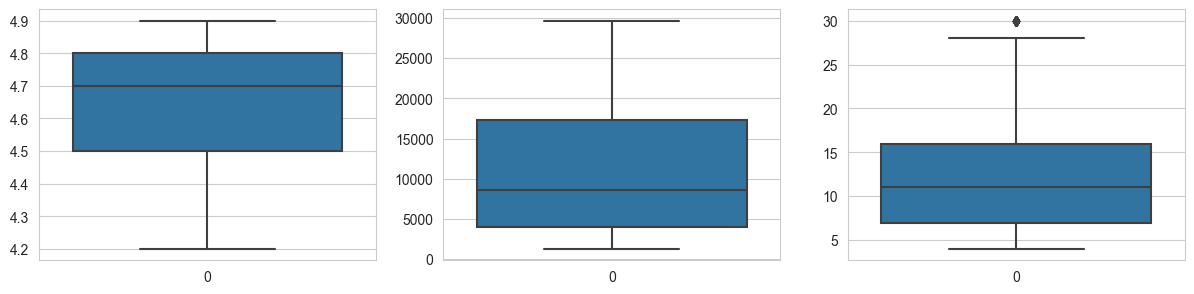

In [64]:
# Outlier testing
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(df['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(df['Price'])

<AxesSubplot: xlabel='Year', ylabel='count'>

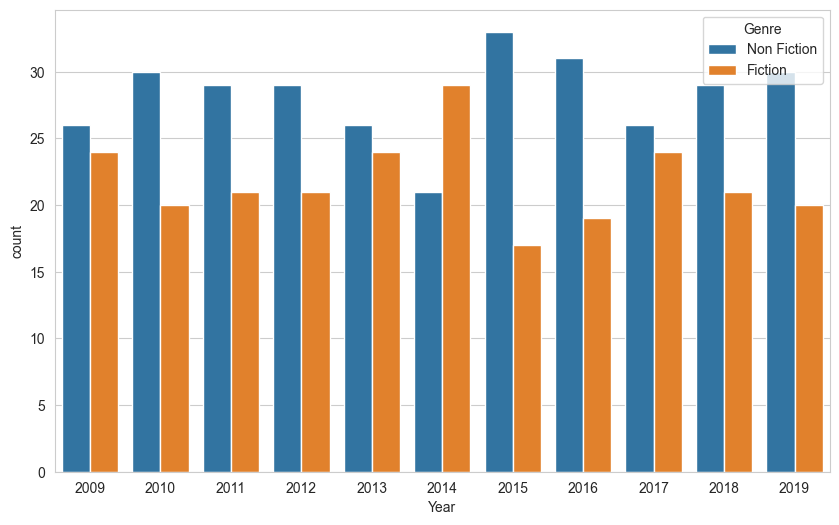

In [65]:
# Exploring Trend over a year for each genre

plt.figure(figsize=(10,6))
sns.countplot(x='Year', data=df, hue='Genre')


<AxesSubplot: xlabel='Year', ylabel='Reviews'>

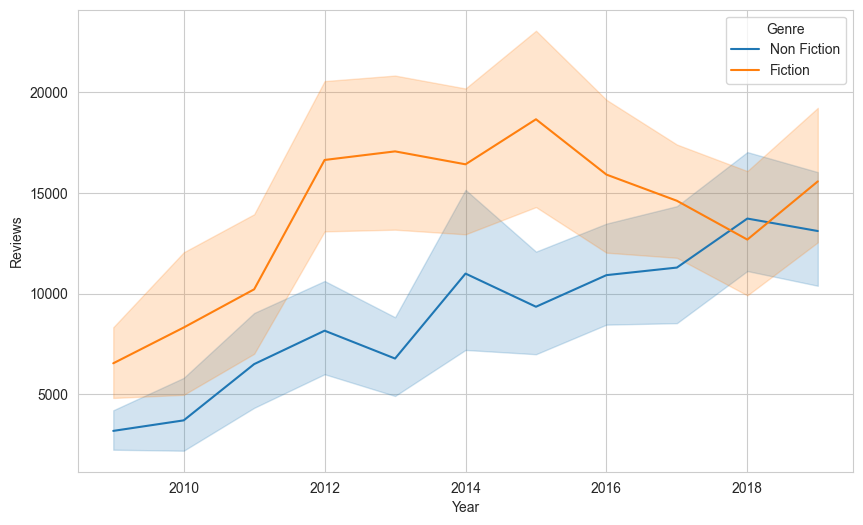

In [66]:
# reviews over the years
plt.figure(figsize=(10,6))
sns.lineplot(x='Year',y='Reviews',data=df,hue='Genre')

<AxesSubplot: xlabel='Year', ylabel='Price'>

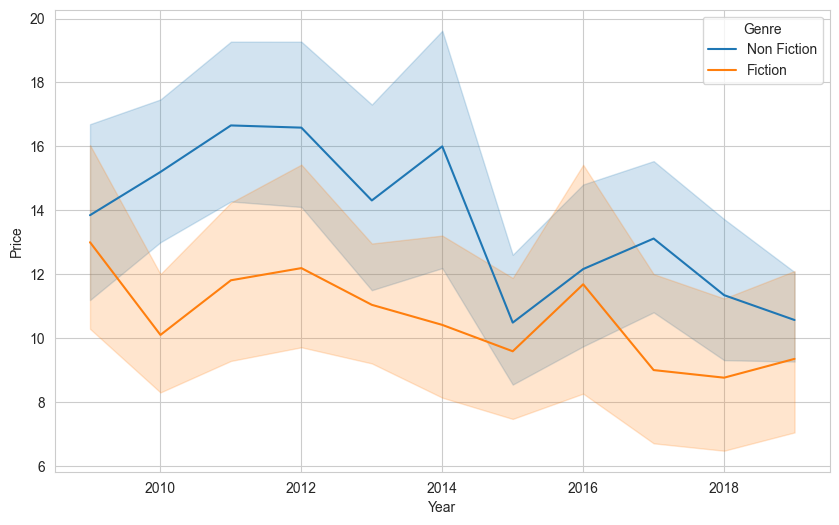

In [67]:
# prices over the years

plt.figure(figsize=(10,6))
sns.lineplot(x='Year',y='Price',data=df,hue='Genre')

In [68]:
 x=df[df['User Rating']==4.9]
x.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344.0,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344.0,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062.0,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786.0,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235.0,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235.0,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619.0,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089.0,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470.0,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038.0,7,2012,Fiction


<AxesSubplot: ylabel='Name'>

C:\Users\ishika\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
C:\Users\ishika\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


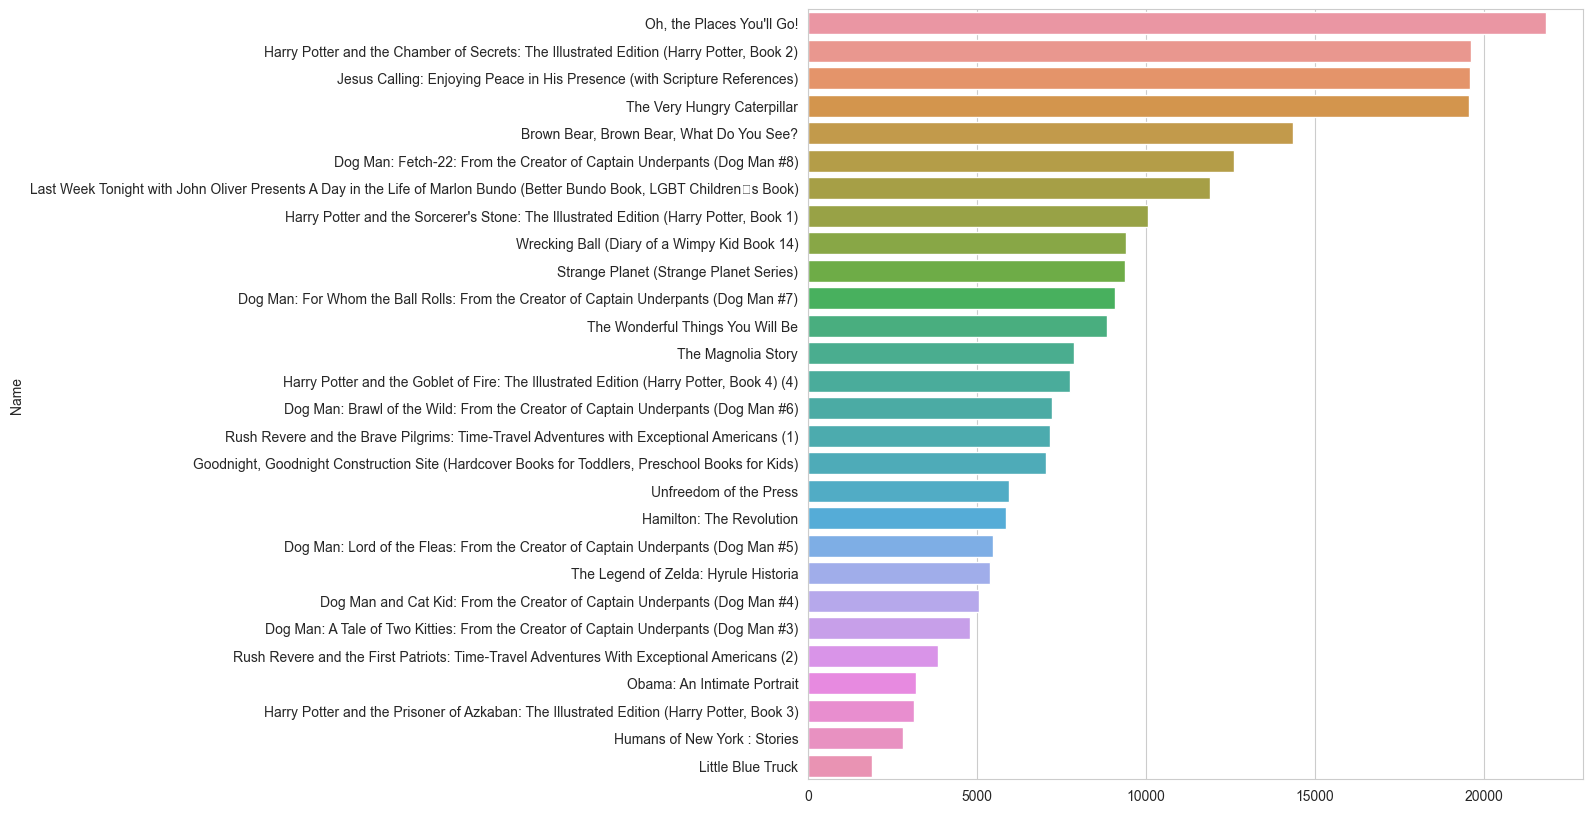

In [69]:
# Reviews for books
y= x.groupby('Name').Reviews.mean().sort_values(ascending=False)
plt.figure(figsize= (10,10))
sns.set_style('whitegrid')
sns.barplot(x= y.values, y=y.index)

In [70]:
# Bestselling book-Authors
temp_df=df.groupby('Author').count().reset_index().sort_values('Name',ascending=False).head()
temp_df

,Author,Name,User Rating,Reviews,Price,Year,Genre
120,Jeff Kinney,12,12,12,12,12,12
92,Gary Chapman,11,11,11,11,11,11
226,Suzanne Collins,11,11,11,11,11,11
197,Rick Riordan,11,11,11,11,11,11
11,American Psychological Association,10,10,10,10,10,10


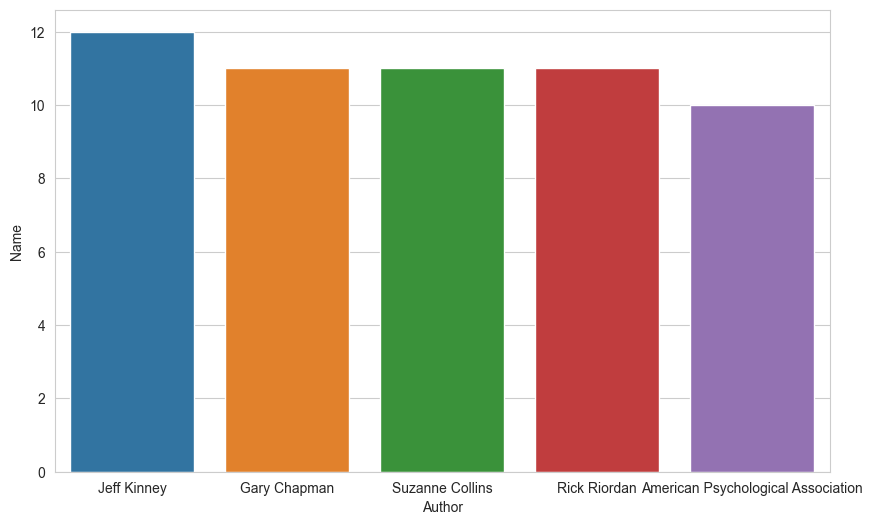

In [71]:
 plt.figure(figsize=(10,6))
sns.barplot(x='Author',y='Name',data=temp_df)

plt.show()

<AxesSubplot: xlabel='User Rating', ylabel='Reviews'>

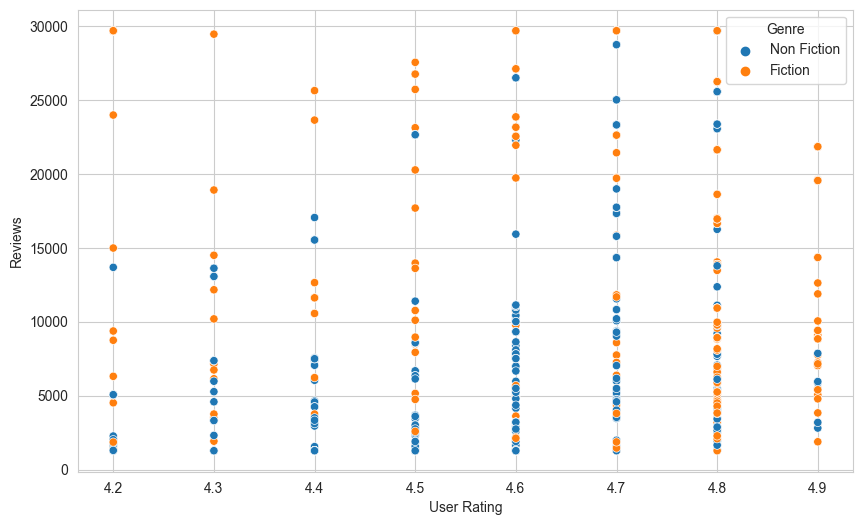

In [72]:
# User rating and review relation
plt.figure(figsize=(10,6))
sns.scatterplot(x='User Rating',y="Reviews",data=df,hue="Genre")
   

<AxesSubplot: xlabel='User Rating', ylabel='Price'>

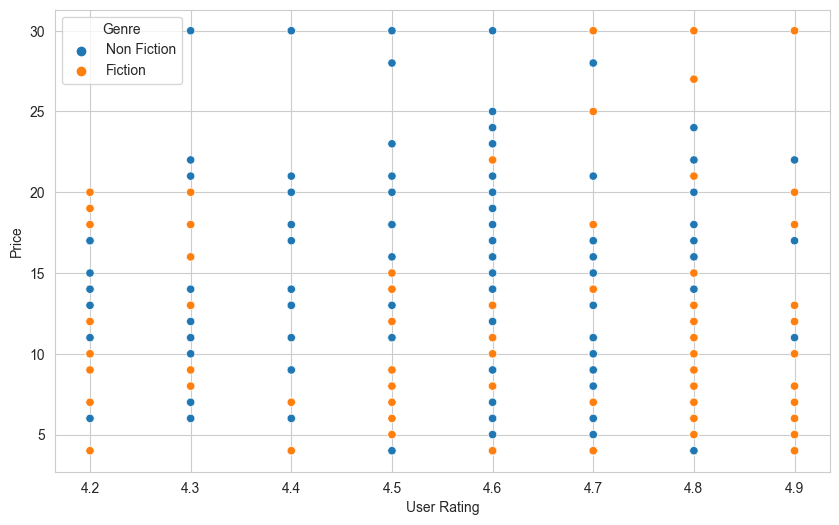

In [73]:
# user rating and Price relation
plt.figure(figsize=(10,6))
sns.scatterplot(x='User Rating',y="Price",data=df,hue='Genre')